In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
df=pd.read_csv("kmeans.csv")

In [3]:
df.head()

,Unnamed: 0,height,weight
0,0,177.640523,47.235051
1,1,164.001572,63.268093
2,2,169.787380,64.322181
3,3,182.408932,56.289175
4,4,178.675580,71.348773


In [4]:
df

,Unnamed: 0,height,weight
0,0,177.640523,47.235051
1,1,164.001572,63.268093
2,2,169.787380,64.322181
3,3,182.408932,56.289175
4,4,178.675580,71.348773
5,5,150.227221,52.728172
6,6,169.500884,60.228793
7,7,158.486428,59.064081
8,8,158.967811,67.663896
9,9,164.105985,67.346794


In [5]:
df.drop(columns="Unnamed: 0", inplace=True)

In [6]:
df.columns

Index(['height', 'weight'], dtype='object')

<Axes: xlabel='height', ylabel='weight'>

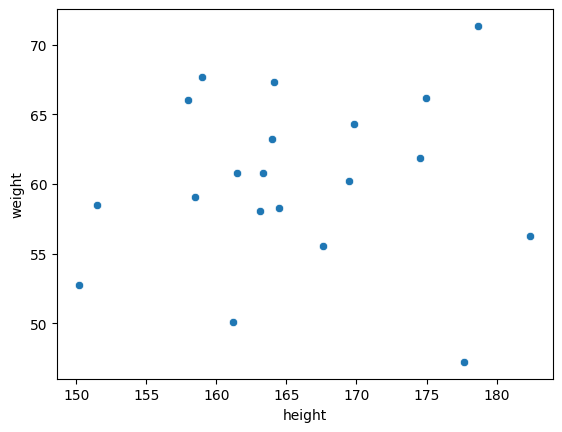

In [7]:
import seaborn as sns
sns.scatterplot(x=df["height"],y=df["weight"])

In [8]:
individual_clustering_score = []
for i in range(1, 5): #1, 2,3,4
    kmeans = KMeans(n_clusters = i, init = 'random', random_state = 42) #i=1, i=2
    kmeans.fit(df) # training happens for 1 custer, training for 2 clusters
    individual_clustering_score.append(kmeans.inertia_) # k=1 interia, inertia for k=2

#When init='random', the KMeans algorithm randomly selects observations from the dataset as initial centroids



In [9]:
print(individual_clustering_score)

[2151.080556348591, 1138.7629692614842, 835.3433070493865, 575.3068145631814]


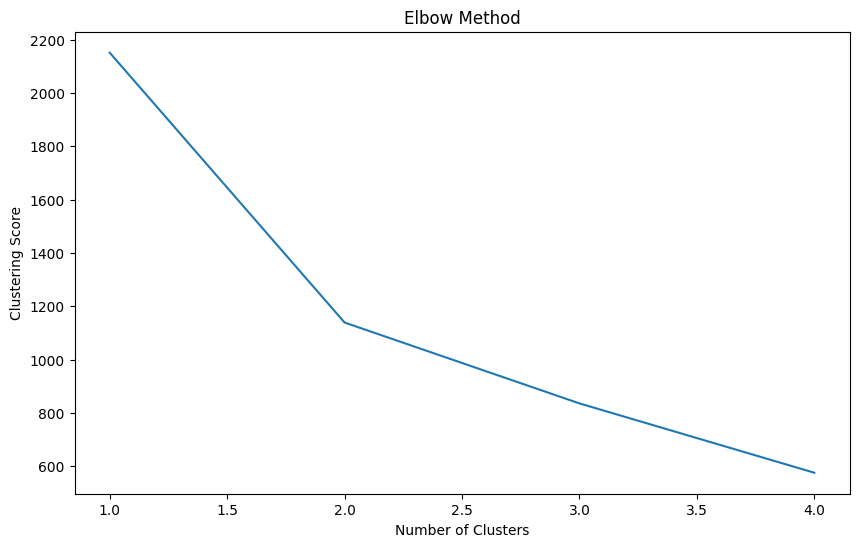

In [10]:
plt.figure(figsize=(10,6))
plt.plot(range(1, 5), individual_clustering_score)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Clustering Score')
plt.show()

In [11]:
#Fit the model and predict
kmeans= KMeans(n_clusters = 2, random_state = 42)


kmeans.fit(df) # training

# prediction
pred = kmeans.predict(df)

pred

array([1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0],
      dtype=int32)

In [12]:
df.head()

,height,weight
0,177.640523,47.235051
1,164.001572,63.268093
2,169.787380,64.322181
3,182.408932,56.289175
4,178.675580,71.348773


In [18]:
df["cluster"]=pd.DataFrame(pred,columns=["clusters"]) #Adding cluster column to main data

In [19]:
df

,height,weight,cluster
0,177.640523,47.235051,1
1,164.001572,63.268093,0
2,169.787380,64.322181,1
3,182.408932,56.289175,1
4,178.675580,71.348773,1
5,150.227221,52.728172,0
6,169.500884,60.228793,1
7,158.486428,59.064081,0
8,158.967811,67.663896,0
9,164.105985,67.346794,0


<Axes: xlabel='height', ylabel='weight'>

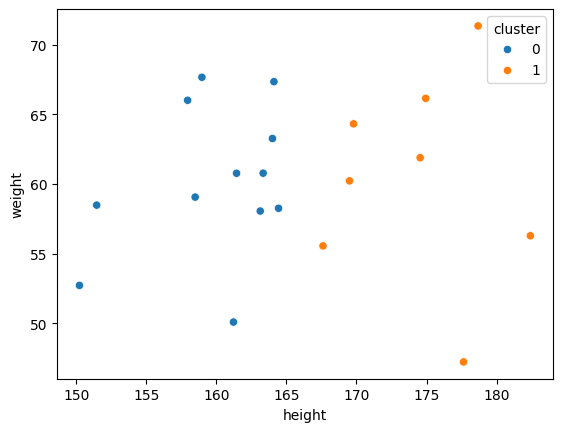

In [21]:
sns.scatterplot(x=df["height"],y=df["weight"],hue=df["cluster"])
# something